# **LINEAR REGRESSION TASK 1**

# *A task assigned to **ONUBA CHIBUIKE WINNER** by The Sparks Foundation*

A task done to predict the percentage of a student based on the no. of study hours

Here, we import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [102]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **VISUALIZATION**

we plot the 'Scores' against 'No of Hours' to clearly see the relationship

Text(0.5, 1.0, 'HOURS AGAINST SCORE')

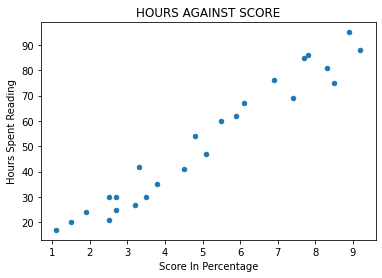

In [6]:
data.plot('Hours', 'Scores', kind='scatter')
plt.ylabel('Hours Spent Reading')
plt.xlabel('Score In Percentage')
plt.title('HOURS AGAINST SCORE')

Here, we will our assign the independent and dependent values into variables x and y respectively

In [29]:
x = data['Hours'].values  #independent variables
y= data['Scores'].values #dependent variables
x = x.reshape(-1,1)
y= y.reshape(-1,1)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size = 0.2)

# Modeling

Here we train the model with our 'train' samples

In [33]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

Lets take a look at the regression line and other details

Regression Coefficient:  [10.46110829]
Regression Intercept:  [-1.53695733]


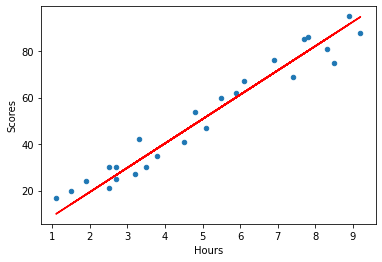

In [110]:
print('Regression Coefficient: ', lreg.coef_[0])
print('Regression Intercept: ', lreg.intercept_)

line = lreg.coef_ * x + lreg.intercept_
data.plot('Hours', 'Scores', kind='scatter')
plt.plot(x, line, color='red')

plt.show()


It can be seen that the variables has a strong positive relationship

Hence an increase in the ***Hours*** spent to read leads to an increase in test ***Scores***

## Prediction

In [58]:
y_pred = lreg.predict(x_test).round(2)

Comparing our predicted scores with the actual score

In [88]:
result = pd.DataFrame(y_test, columns=['Actual'])
result['Predicted'] = pd.DataFrame(y_pred)

In [89]:
#ACTUAL SCORE VS PREDICTED SCORE
result   

,Actual,Predicted
0,17,9.97
1,42,32.98
2,24,18.34
3,75,87.38
4,54,48.68


# **What will be the predicted score if a student studies for 9.25 hrs/day**



In [112]:
study_hours = 9.25

pred_score = lreg.predict([[study_hours]])

print('No of study hours: ', study_hours)
print('Predicted Score: ', pred_score[0])

No of study hours:  9.25
Predicted Score:  [95.22829438]


## **MODEL EVALUATION**

The evaluation of a model helps us understand a machine learning model's performance

The r2 metric is measured in percentage. >80% is considered a good model, <50% is considered a very poor model

In [121]:
from sklearn.metrics import r2_score

print('r2 Score = {}%'.format(round(r2_score(y_test, y_pred)*100, 2)))

r2 Score = 84.21%
